In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
import seaborn as sns; sns.set()
import math

In [4]:
#Read Excel/CSV File

pd__fam_12m_df = pd.read_excel("/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/poverty_line_analysis/PS_families_12.xlsx", sheet_name='Data')
pd_12m_df = pd.read_excel("/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/poverty_line_analysis/ps_12.xlsx", sheet_name='Data')
income_population_df = pd.read_excel('/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/poverty_line_analysis/IncomeRanges.xlsx', sheet_name="Data")
# pd__fam_12m_df.head()
# pd_12m_df

In [4]:
# Rename columns for better understanding
pd__fam_12m_df.rename(columns={'Percent below poverty level': '% Families below poverty level', 
                          'Percent below poverty level.1': '% Married-couple families below poverty level', 
                          'Percent below poverty level.2': '% Female householder families below poverty level'}, 
                 inplace=True)

In [5]:
# Dataframe with poverty distribution based on ethnicity of householder
df_ps_ethnicity = pd__fam_12m_df[7:16]
df_ps_ethnicity

,Category,All families,% Families below poverty level,Married-couple families,% Married-couple families below poverty level,"Female householder, no spouse present",% Female householder families below poverty level
7,White alone,"843,644",4.2%,"674,728",1.8%,"119,209",15.6%
8,Black or African American alone,"75,469",10.5%,"38,213",3.6%,"29,244",19.2%
9,American Indian and Alaska Native alone,NaN,NaN,NaN,NaN,NaN,NaN
10,Asian alone,"102,142",7.9%,"83,815",5.8%,"11,821",18.2%
11,Native Hawaiian and Other Pacific Islander alone,NaN,NaN,NaN,NaN,NaN,NaN
12,Some other race alone,"61,597",16.7%,"33,187",10.8%,"20,428",30.4%
13,Two or more races,"109,136",13.6%,"72,231",7.9%,"27,507",26.8%
14,Hispanic or Latino origin (of any race),"127,641",19.2%,"70,912",10.6%,"42,503",34.4%
15,"White alone, not Hispanic or Latino","829,294",3.9%,"666,519",1.8%,"114,862",14.2%


In [6]:
# drop rows containing null values
df_ps_ethnicity.dropna(axis = 0, how='any', inplace=True)
df_ps_ethnicity

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Category,All families,% Families below poverty level,Married-couple families,% Married-couple families below poverty level,"Female householder, no spouse present",% Female householder families below poverty level
7,White alone,"843,644",4.2%,"674,728",1.8%,"119,209",15.6%
8,Black or African American alone,"75,469",10.5%,"38,213",3.6%,"29,244",19.2%
10,Asian alone,"102,142",7.9%,"83,815",5.8%,"11,821",18.2%
12,Some other race alone,"61,597",16.7%,"33,187",10.8%,"20,428",30.4%
13,Two or more races,"109,136",13.6%,"72,231",7.9%,"27,507",26.8%
14,Hispanic or Latino origin (of any race),"127,641",19.2%,"70,912",10.6%,"42,503",34.4%
15,"White alone, not Hispanic or Latino","829,294",3.9%,"666,519",1.8%,"114,862",14.2%


In [7]:
# Rename columns for better understanding
df_ps_ethnicity['% Families below poverty level'] = (df_ps_ethnicity['% Families below poverty level']).str.replace('%', '')
df_ps_ethnicity['% Families below poverty level'] = df_ps_ethnicity['% Families below poverty level'].astype(float)
df_ps_ethnicity['% Married-couple families below poverty level'] = (df_ps_ethnicity['% Married-couple families below poverty level']).str.replace('%', '')
df_ps_ethnicity['% Married-couple families below poverty level'] = df_ps_ethnicity['% Married-couple families below poverty level'].astype(float)
df_ps_ethnicity['% Female householder families below poverty level'] = (df_ps_ethnicity['% Female householder families below poverty level']).str.replace('%', '')
df_ps_ethnicity['% Female householder families below poverty level'] = df_ps_ethnicity['% Female householder families below poverty level'].astype(float)
df_ps_ethnicity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 7 to 15
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Category                                           7 non-null      object 
 1   All families                                       7 non-null      object 
 2   % Families below poverty level                     7 non-null      float64
 3   Married-couple families                            7 non-null      object 
 4   % Married-couple families below poverty level      7 non-null      float64
 5   Female householder, no spouse present              7 non-null      object 
 6   % Female householder families below poverty level  7 non-null      float64
dtypes: float64(3), object(4)
memory usage: 448.0+ bytes


<ipython-input-7-f6f4bf8572a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ps_ethnicity['% Families below poverty level'] = (df_ps_ethnicity['% Families below poverty level']).str.replace('%', '')
<ipython-input-7-f6f4bf8572a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ps_ethnicity['% Families below poverty level'] = df_ps_ethnicity['% Families below poverty level'].astype(float)
<ipython-input-7-f6f4bf8572a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [5]:
income_population_df = income_population_df[income_population_df.columns.drop(list(income_population_df.filter(regex='Margin of Error')))]
income_population_df.rename(columns= {'Estimate': 'Total number of people', 'Estimate.1': 'Number of people below poverty line'}, inplace=True)
income_population_df.isna().sum()
income_population_df.rename(columns={'Boston-Cambridge-Newton, MA-NH Metro Area!!Households!!Estimate': 'Household', 'Boston-Cambridge-Newton, MA-NH Metro Area!!Families!!Estimate': 'Families',  'Boston-Cambridge-Newton, MA-NH Metro Area!!Married-couple families!!Estimate' : 'Married Couple Families', 'Boston-Cambridge-Newton, MA-NH Metro Area!!Nonfamily households!!Estimate': 'Non Family Households', 'Label (Grouping)': 'Category'}, inplace=True)
income_population_df = income_population_df[1:11]

In [7]:
income_population_df

,Label,Households,Families,Married-couple families,Nonfamily households
0,Total,"1,920,160","1,194,014","903,811","726,146"
1,"Less than $10,000",5.0,2.7%,1.1%,9.4%
2,"$10,000 to $14,999",3.5,1.8%,0.9%,6.7%
3,"$15,000 to $24,999",5.3,3.2%,1.7%,9.1%
4,"$25,000 to $34,999",4.9,3.7%,2.1%,7.3%
5,"$35,000 to $49,999",7.4,6.1%,4.4%,10.0%
6,"$50,000 to $74,999",12.4,10.6%,9.1%,15.8%
7,"$75,000 to $99,999",11.1,10.8%,10.2%,11.8%
8,"$100,000 to $149,999",18.1,19.9%,20.7%,14.7%
9,"$150,000 to $199,999",11.9,14.5%,16.9%,6.9%


In [8]:
income_population_df = income_population_df[1:11]

In [9]:
income_population_df['Households'] = (income_population_df['Households']).str.replace('%', '')
income_population_df['Households'] = income_population_df['Households'].astype(float)
income_population_df['Families'] = (income_population_df['Families']).str.replace('%', '')
income_population_df['Families'] = income_population_df['Families'].astype(float)
income_population_df['Married-couple families'] = (income_population_df['Married-couple families']).str.replace('%', '')
income_population_df['Married-couple families'] = income_population_df['Married-couple families'].astype(float)
income_population_df['Nonfamily households'] = (income_population_df['Nonfamily households']).str.replace('%', '')
income_population_df['Nonfamily households'] = income_population_df['Nonfamily households'].astype(float)
income_population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Label                    10 non-null     object 
 1   Households               10 non-null     float64
 2   Families                 10 non-null     float64
 3   Married-couple families  10 non-null     float64
 4   Nonfamily households     10 non-null     float64
dtypes: float64(4), object(1)
memory usage: 532.0+ bytes


<ipython-input-9-b44477abbbf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_population_df['Households'] = (income_population_df['Households']).str.replace('%', '')
<ipython-input-9-b44477abbbf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_population_df['Households'] = income_population_df['Households'].astype(float)
<ipython-input-9-b44477abbbf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [10]:
income_population_df.rename(columns={'Label': 'Salary Range'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
income_population_df_mod1 = income_population_df[0:3]
income_population_df_mod2= income_population_df[4:11]

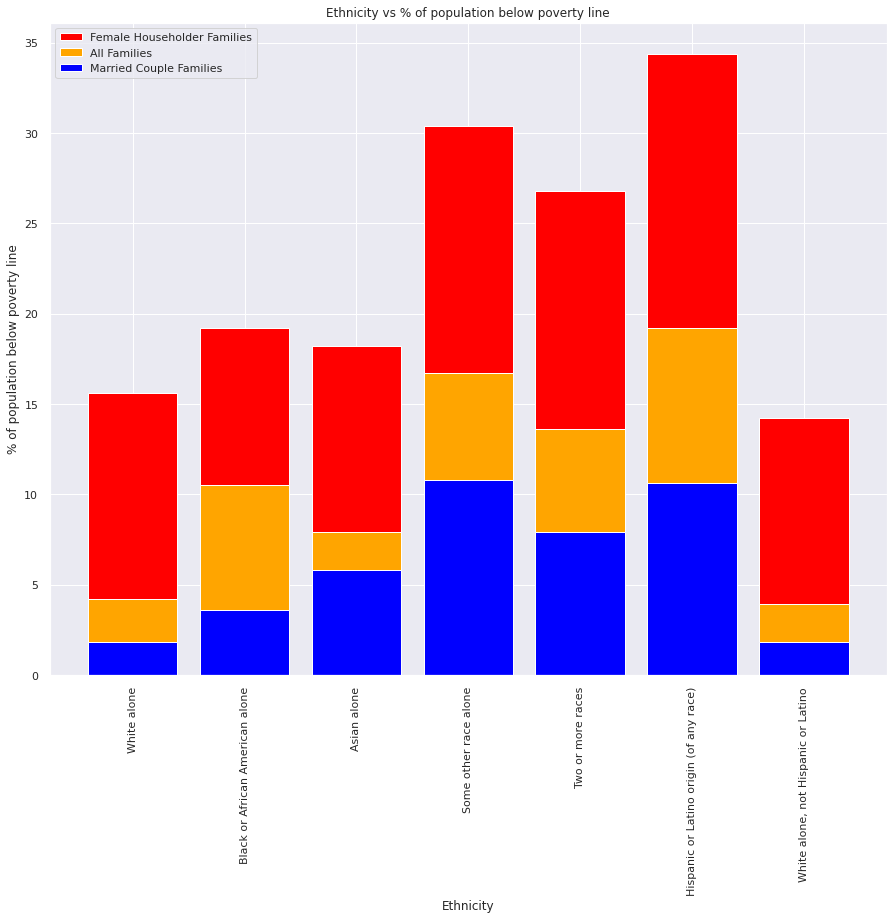

In [8]:
plt.figure(figsize=(15, 12))
plt.bar(df_ps_ethnicity['Category'], df_ps_ethnicity['% Female householder families below poverty level'], color="red", label="Female Householder Families")
plt.bar(df_ps_ethnicity['Category'], df_ps_ethnicity['% Families below poverty level'], color="orange", label= "All Families")
plt.bar(df_ps_ethnicity['Category'], df_ps_ethnicity['% Married-couple families below poverty level'], color="blue", label="Married Couple Families")
plt.ylabel("% of population below poverty line")
plt.xlabel("Ethnicity")
plt.title("Ethnicity vs % of population below poverty line")
plt.legend()
plt.xticks(rotation = 90)
plt.show()


From above plot we get the distribution of people below poverty line in each of the ethnic group. And in each ethnicity we have different category of people and we can see the percent of people below poverty line are more in case of families who has female as house householder each ethnicity and less in case of people who have married couple as householders. And overall we can see that people belong to hispanic or latino origin have highest poverty population followed by Black or African household.

In [9]:
# Gender distribution data frame
gender_df = pd.concat([pd_12m_df[12:14], pd_12m_df[33:35], pd_12m_df[36:38]], ignore_index=True)
gender_df

,Category,Total,Below poverty level,Percent below poverty level
0,Male,"2,320,185","186,125",8.0%
1,Female,"2,421,477","255,538",10.6%
2,Employed Male,"1,325,756","42,028",3.2%
3,Employed Female,"1,250,962","58,357",4.7%
4,Unemployed Male,"86,967","15,337",17.6%
5,Umemployed Female,"75,444","18,914",25.1%


In [10]:
# converting string to float
gender_df['Total'] = gender_df['Total'].str.replace(",", '')
gender_df['Below poverty level'] = gender_df['Below poverty level'].str.replace(",", '')
gender_df['Total'] = gender_df['Total'].astype(float)
gender_df['Below poverty level'] = gender_df['Below poverty level'].astype(float)
gender_df['Percent below poverty level'] = (gender_df['Percent below poverty level']).str.replace('%', '')
gender_df['Percent below poverty level'] = gender_df['Percent below poverty level'].astype(float)

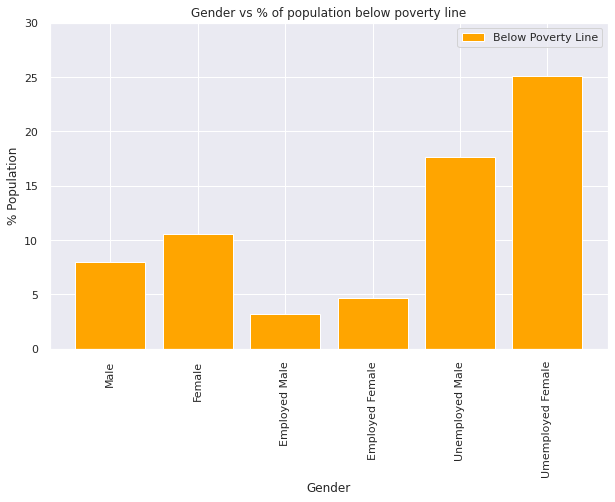

In [11]:
# Plotting bar graph for gender vs % population below poverty line 
# plt.bar(gender_df['Category'], gender_df['Total'], color="red", label="Total Population considered for survey")
# plt.bar(gender_df['Category'], gender_df['Below poverty level'], color="orange", label= "Below Poverty Line")
plt.figure(figsize=(10, 6))
plt.bar(gender_df['Category'], gender_df['Percent below poverty level'], color="orange", label= "Below Poverty Line")
plt.ylabel("% Population")
plt.xlabel("Gender")
plt.ylim(0, 30)
plt.legend()
plt.xticks(rotation = 90)
plt.title("Gender vs % of population below poverty line")
plt.show()

From above plot we can see the percent of population below poverty in relationship with gender. And also based on employment in each gender how percent of population below poverty line is varying. As expected the % of population below poverty line is high incase of female who are unemployed.

In [ ]:
ps_age_df = pd_12m_df[2:10]
ps_age_df = pd.concat([ps_age_df[0:1], ps_age_df[4:8]], ignore_index=True)

,Category,Total,Below poverty level,Percent below poverty level
0,Under 18 years,"940,401","100,583",10.7%
1,18 to 64 years,"3,012,858","257,060",8.5%
2,18 to 34 years,"1,094,838","113,745",10.4%
3,35 to 64 years,"1,918,020","143,315",7.5%
4,60 years and over,"1,113,052","111,613",10.0%


In [ ]:
ps_age_df['Percent below poverty level'] = (ps_age_df['Percent below poverty level']).str.replace('%', '')
ps_age_df['Percent below poverty level'] = ps_age_df['Percent below poverty level'].astype(float)

In [ ]:
ps_age_df

,Category,Total,Below poverty level,Percent below poverty level
0,Under 18 years,"940,401","100,583",10.7
1,18 to 64 years,"3,012,858","257,060",8.5
2,18 to 34 years,"1,094,838","113,745",10.4
3,35 to 64 years,"1,918,020","143,315",7.5
4,60 years and over,"1,113,052","111,613",10.0


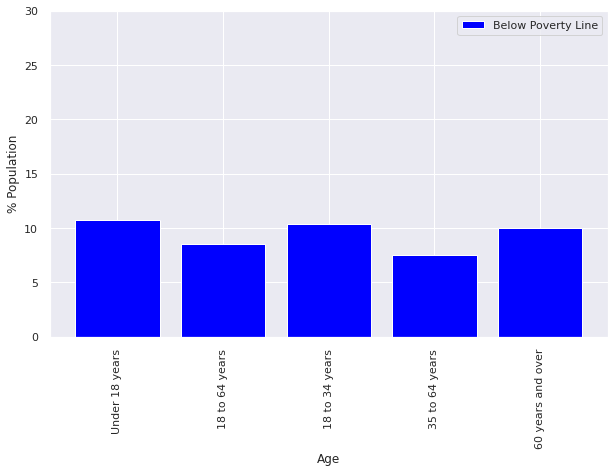

In [ ]:
# Plotting bar graph for gender vs % population below poverty line 
# plt.bar(gender_df['Category'], gender_df['Total'], color="red", label="Total Population considered for survey")
# plt.bar(gender_df['Category'], gender_df['Below poverty level'], color="orange", label= "Below Poverty Line")
plt.figure(figsize=(10, 6))
plt.bar(ps_age_df['Category'], ps_age_df['Percent below poverty level'], color="blue", label= "Below Poverty Line")
plt.ylabel("% Population")
plt.xlabel("Age")
plt.ylim(0, 30)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

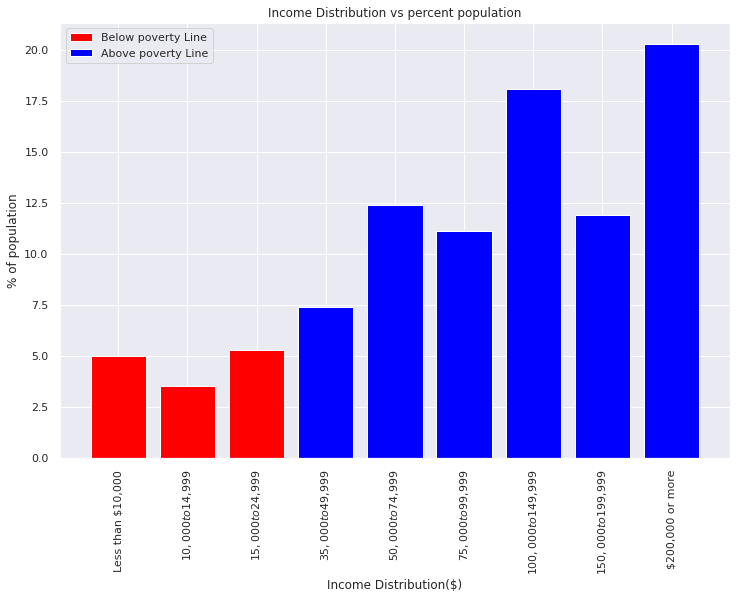

In [12]:
plt.figure(figsize=(12, 8))
plt.bar(income_population_df_mod1['Salary Range'], income_population_df_mod1['Households'], color="red", label="Below poverty Line")
plt.bar(income_population_df_mod2['Salary Range'], income_population_df_mod2['Households'], color="blue", label="Above poverty Line")
plt.ylabel("% of population")
plt.xlabel("Income Distribution($)")
plt.title("Income Distribution vs percent population")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

As from following govt website 'https://aspe.hhs.gov/2021-poverty-guidelines' the threshold income of a household of 4 people is '$ 26,500' and considering this we can say that first three ranges in salary distribution(in red) indicate the percent population below poverty line in above plot